# PyTorch Computer Vision
* Notebook coded by Adam Lang as part of the `Deep Learning with PyTorch Bootcamp` with Professor Daniel Bourke.
* Date: 4/15/2024

## 0. Computer Vision Libraries in PyTorch

* [`torchvision`] - base domain library for PyTorch Computer Vision
    * documentation: https://pytorch.org/vision/stable/index.html
* `torchvision.datasets` - get datasets and data loading functions for computer vision here.
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems.
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model.
    * Helps with pre-processing of image data.
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset.

In [1]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # converts PIL image or numpy.ndarray to tensor


# Import matplotlib for visualization of our image data
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## 1. Getting an image dataset

* The dataset we will be using is `FashionMNIST` from torchvision.datasets
    * "hello world" of computer vision datasets, original MNIST dataset: https://en.wikipedia.org/wiki/MNIST_database
    * `FashionMNIST` dataset
        * Part of default datasets in PyTorch: https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

* Other PyTorch Datasets: https://pytorch.org/vision/stable/datasets.html?highlight=datasets

In [2]:
# Setup training data
from torchvision import datasets

# train data
train_data = datasets.FashionMNIST(
    root="data", #where to download data to
    train=True, # do we want the training dataset? If false get testing dataset
    download=True, # do we want to download it yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None #how do we want to transform the labels/targets?
)


# test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None

)

100%|██████████| 26421880/26421880 [00:07<00:00, 3609386.60it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 334951.93it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6127481.07it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16647861.98it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### Data Wrangling and Exploration - Parameters and Attributes of Data

#### 1. Datasets len

In [3]:
# len of data
len(train_data), len(test_data)

(60000, 10000)

There are:
* 60,000 training examples
* 10,000 testing examples

Goals:
* Build a machine learning model on the training data, find patterns in the data and use model to predict on the test data.

#### 2. First training example
* We will see that the `transform=ToTensor()` transformed our data to tensors.

In [4]:
# see first training example
image, label = train_data[0] #zero index
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

We can also see the data image label is `9` at the bottom of the tensor.

#### 3. Class Names of our data

In [5]:
# class names of the dataset
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

The Tensor we viewed as an Ankle Boot

#### 4. Class to IDX - dictionary labels

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

We can confirm the random tensor we viewed was 'Ankle Boot'

#### 5. Other attributes

In [7]:
# train_data attributes - lets try the targets
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

#### 6. Shape of data
* label doesn't have a shape because its an integer not a tensor

## 1.1 Check input and output shapes of data

In [8]:
# check shape of our image - label doesnt have a shape because it's an integer
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Summary:
* Image shape is 1 color channel, height of 28, width of 28
    * Why does it only have 1 color channel? Its black and white!
    * **Gray scale images only have 1 color channel!**
    * **RGB usually have 3 channels - Red, Green, Blue**
* Image label: Ankle Boot

# Input and Output Shapes - Why are these important for image data?
1. By default PyTorch turns input shapes into color channels first
2. Output shape is 10 as we can see below based on the model predictive probabilities.

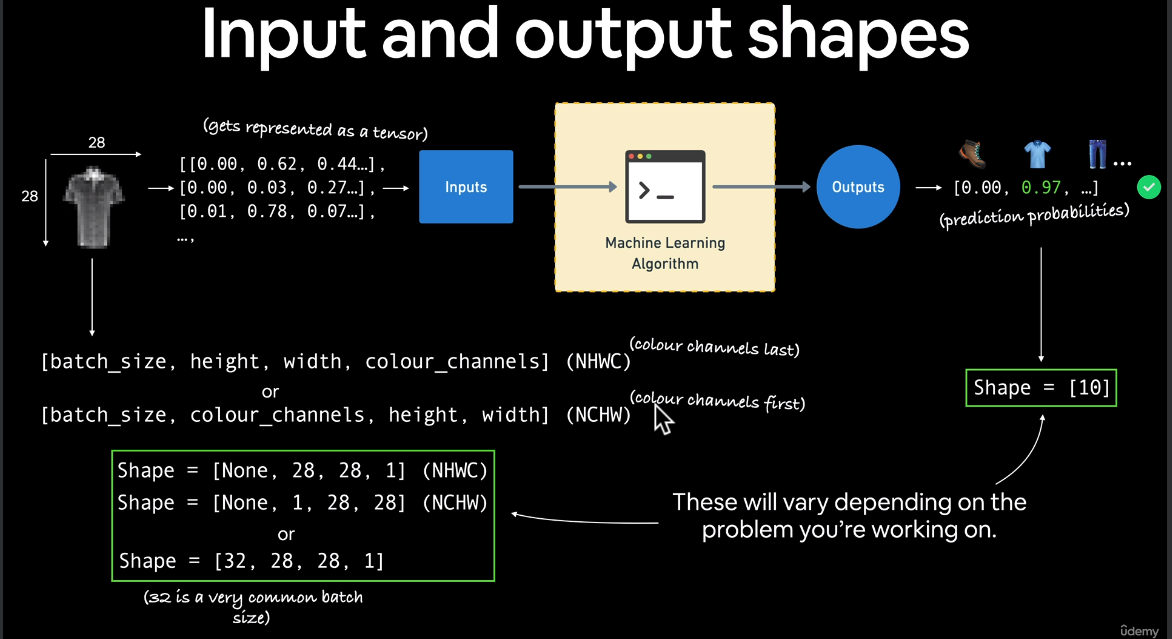

Input Data Details
* None = batch size (we can set this to whatever we like)
* NCHW = None, color channels, height, width
* NHWC = None, height, width, color channels
    * Note: color channels first vs. last depends on your dataset and modeling.


## 1.2 Visualizing the data
* "Become one with the data"

Image shape: torch.Size([1, 28, 28])


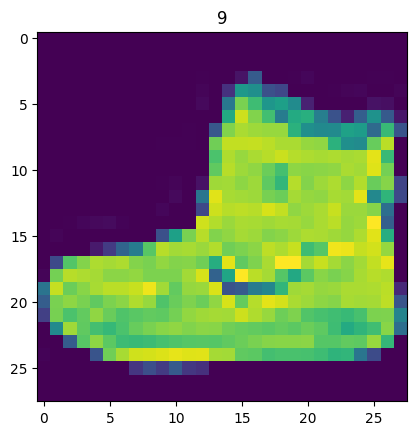

In [9]:
import matplotlib.pyplot as plt

# create image and label
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # we need to use .squeeze to get rid of extra dimension for gray scale
plt.title(label);
#image

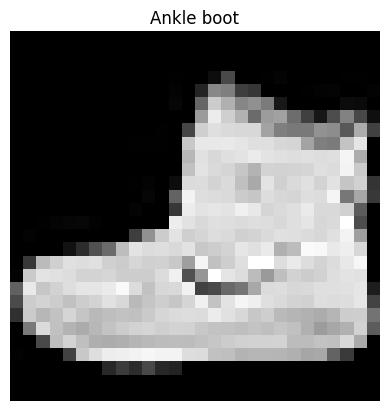

In [10]:
# plot in grayscale
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);
plt.axis(False);

Random Sample of 16 images from out dataset
* Print random indices

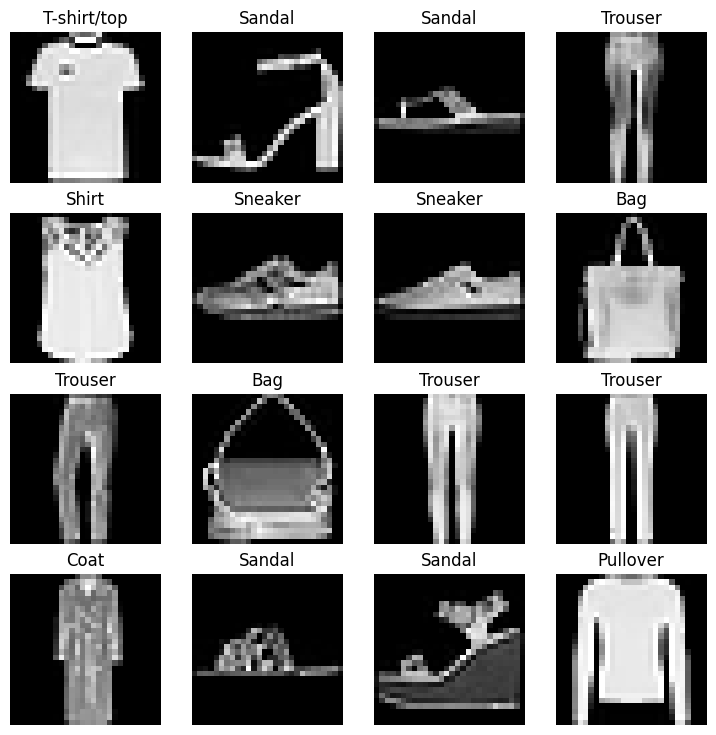

In [11]:
# plot more images - random images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4 # 4x4 grid
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  #print(random_idx) => this prints the indices
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

Summary:
* 60,000 images of clothing
* Goals is to build classifier to classify each image class.
* Do you think these clothing (images) could be modeled with pure linear lines? Or do you think we need a non-linear model (nn)? Think about it....

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

We need to convert from Dataset into a DataLoader

## 2. Prepare PyTorch Data Loader

* Right now, our data is in the form of PyTorch Datasets.
* DataLoader turns our dataset into a Python interable.
* More specifically, we want to turn our data into batches (or mini-batches).
    * watch this: https://www.youtube.com/watch?v=4qJaSmvhxi8
* Why would we do this (mini-batches + DataLoader)
    * 1. More computationally efficient, as in your computing hardware may not be able to look (store in memory) at 60,000 images in 1 hit. So we break it down to 32 images at a time (batch size of 32)
    * 2. It gives our neural network more chances to update its gradients per epoch.

### What we are going to do with the DataLoader
* See code snippet below.
* Why do we set `shuffle=True`
    * In case dataset has order (e.g. all sandals in a row, all t-shirts in a row)
    * We want to "shuffle" or "mix-it up" to prevent order memorization and allow better generalization on new unseen data.
* 32 samples per batch


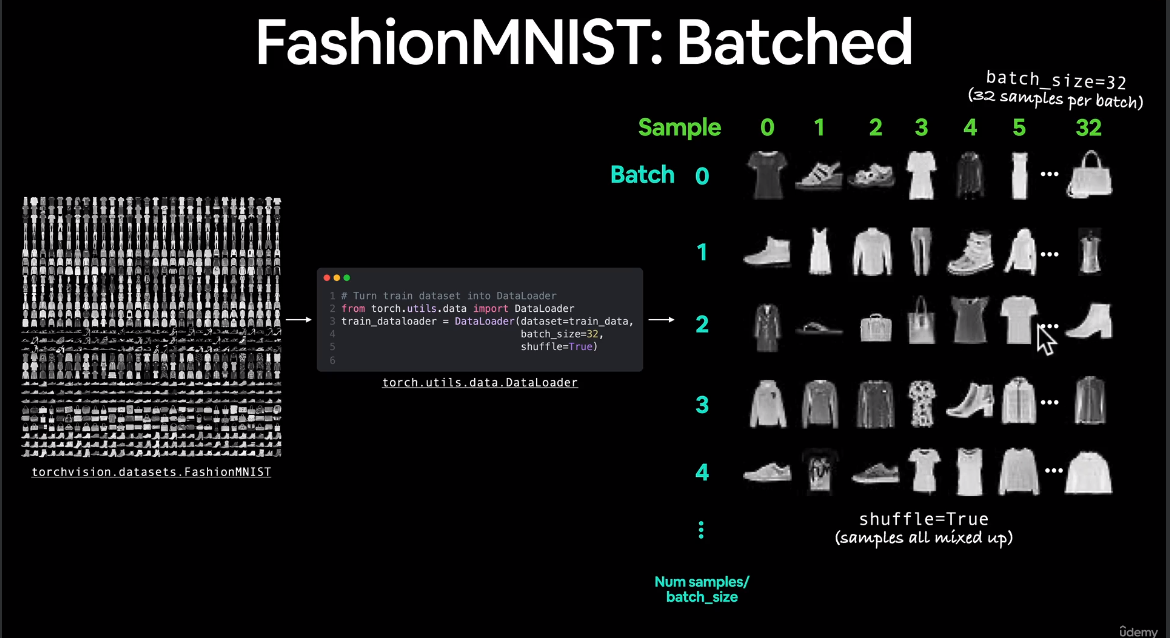

In [13]:
# import dataloader
from torch.utils.data import DataLoader


# setup batch size hyperparameter - how many images at a time?
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

# set up test_dataloader - not going to shuffle - why? Easier to evaluate when test data is not shuffled
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)


#print
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b10b30f0a00>,
 <torch.utils.data.dataloader.DataLoader at 0x7b10b30f3400>)

In [14]:
# lets checkout what we created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b10b30f0a00>, <torch.utils.data.dataloader.DataLoader object at 0x7b10b30f3400>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


This means that our model will iterate over batches of the images rather than 1 giant dataload at one time.

In [15]:
## checkout whats in training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) # turn into iterable and get next batch
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Here we see each batch has:
* 32 samples
* 1 color channel
* 28 height
* 28 width
----------------------------
* 32 labels

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


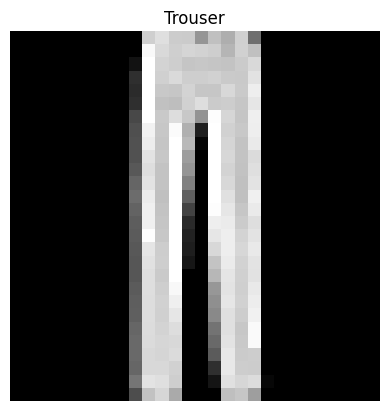

In [16]:
# show a sample from a dataloader batch
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline computer vision model

When starting to build a series of machine learning modeling experiments its best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words, start simply and add complexity when necessary!


**Remember, we don't want the model to do "too well" on the data it leads to overfitting**

#### Flatten layers for computer vision

In [17]:
## creating a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape


## flatten sample
output = flatten_model(x) #perform nn forward pass

# print out what just happened
print(f"Shape before flattening: {x.shape} --> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} --> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) --> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) --> [color_channels, height*width]


What just happened?
* We went from `1, 28, 28` or `color_channels, height, width"
* To `1, 784` or `color_channels, height*width`
* **We are trying to encode or condense data into a single vector space**
* We are going to build a linear model which can only handle 1 vector.

In [18]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

* `layer_stack`: https://pytorch.org/docs/stable/generated/torch.stack.html
* `Flatten()`: https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#flatten
    * Flattens dims into tensor.

In [19]:
## building the linear model
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units, ## input of this layer is output of previous layer
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [20]:
## set up instance of model
torch.manual_seed(42)

# setup model with input params
model_0 = FashionMNISTModelV0(
    input_shape=784, ## output of the flatten or 28x28=784
    hidden_units=10, ## how many units in hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")


# look at model_0
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
## dummy pass
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape ## sends dummy_x through forward
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

* We now have 10 logits or 1 logit per class.

In [22]:
### whats in the model?
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use **accuracy** as our evaluation metric.

Quick Note about SGD vs. Adam and other optimizers
* "Despite superior training outcomes, Adam and other adaptive optimization methods are known to generalize poorly compared to Stochastic gradient descent (SGD). These methods tend to perform well on the training data but are outperformed by SGD on the test data."
* It is debateable about whether `Adam` should be the default optimizer, Key factors leading to the weak empirical generalization capability of Adam are summarized as:
    * The non-uniform scaling of the gradients will lead to the poor generalization performance of adaptive gradients methods. SGD is uniformly scaled, and low training error will generalize well
    * The exponential moving average used in Adam can’t make the learning rate monotonously decline, which will cause it to fail to converge to an optimal solution and arise the poor generalization performance.
    * The learning rate learned by Adam may circumstantially be too small for effective convergence, which will make it fail to find the right path and converge to a suboptimal point.
    * Adam may aggressively increase the learning rate, which is detrimental to the overall performance of the algorithm.
* Source: https://towardsai.net/p/l/why-should-adam-optimizer-not-be-the-default-learning-algorithm

In [23]:
## we need to get an accuracy function from another repo
import requests
from pathlib import Path

# Download helper functions from another repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [24]:
# Import accuracy metric from helper_functions.py
from helper_functions import accuracy_fn

#setup loss func and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine Learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values, etc.)
2. How fast it runs

In [25]:
## time function
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [26]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


8.505699999261651e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

#### A note about batches
* In the training loop below, the optimizer will update a model's parameters once per batch rather than once per epoch
* Mini batches are more memory efficient
* Updating models parameters after each batch is passed through
* `optimizer.step()` call is in the batch loop NOT the epoch loop which allows this to happen.
* Below we will see the "batch loop" is nested inside the epoch loop to achieve this as such:
* `for epoch in tqdm(range(epochs)):`
  * `print(f"Epoch: {epoch}\n------")`
  *`### Training`
  * `train_loss = 0 `
  `# Add a loop to loop through the training batches: X image, y is labels`
  *`for batch, (X, y) in enumerate(train_dataloader):`
    * `model_0.train()`
    * `# 1. Forward pass`
    * `y_pred = model_0(X)`
    `# 2. Calculate loss (per batch)`
    * etc..................

In [27]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches: X image, y is labels
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad - zero gradients
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step, step
    optimizer.step()


    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # in epoch loop - divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader) #avg across how many batches there are

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumuatively)
      test_loss += loss_fn(test_pred, y_test) # compare test pred to y test labels

      # 3. Calculate accuracy - argmax allows comparing labels to labels
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch (per epoch)
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 31.522 seconds


## 4. Make predictions and get Model 0 results

In [28]:
torch.manual_seed(42)

##create function
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
    # return dict - only works when model was created with a class
  return {"model_name": model.__class__.__name__, "model_loss": loss.item(), "model_acc": acc}

 #Calculate model 0 results on test dataset using function
model_0_results = eval_model(model=model_0,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code (for using a GPU if there is one)

In [29]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [30]:
torch.cuda.is_available()

False

In [31]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02

We will use `relu` which is non-linear activation function.

In [32]:
# Create model with linear and non-linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flattens inputs into single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [33]:
# quick check of model_0 device
next(model_0.parameters()).device

device(type='cpu')

In [34]:
# quick check of current device
device

'cpu'

In [35]:
## Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is output of flatten layer after our 28*28 image goes in
          hidden_units=10,
          output_shape=len(class_names)).to(device) # send to GPU if its available

next(model_1.parameters()).device

device(type='cpu')

In [36]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### 6.1 Setup loss function, optimizer and eval metrics

In [37]:
from helper_functions import accuracy_fn #measures models accuracy
loss_fn = nn.CrossEntropyLoss() #measures how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), #optim tries to update our models params to reduce loss
                            lr=0.01)

### 6.2 Functionizing training and eval/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

Note about the function below:
1. The first 4 parameters are most important.
2. The last 2 parameters are "nice to haves".

In [38]:
## create train_step function
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training step with model trying to learn on DataLoader"""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add loop to loop through training batches
  for batch, (X,y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accum train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) #go from logits to prediction labels

    # 3. Optim zero grad
    optimizer.zero_grad()

    # 4. loss backwards
    loss.backward()

    # 5. optimizer step step (update models params once per batch)
    optimizer.step()

    # Print out what's happenin
    #if batch % 400 == 0:
     # print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")



In [39]:
##create test_step function
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Performs a testing loop step on model going over dataloader"""
  test_loss, test_acc = 0, 0

  # Put model in eval mode
  model.eval()

  # Turn on inference model context manager
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                           y_pred=test_pred.argmax(dim=1)) #go from logits to prediction labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")


In [40]:
torch.manual_seed(42)

# Measure time train/test loop
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train step and test step
for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}\n---------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device
                                            )


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
---------
Train loss: 1.42179 | Train acc: 54.29%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 1.12168 | Test acc: 62.15%

Epoch 1
---------
Train loss: 1.03357 | Train acc: 64.58%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.99913 | Test acc: 64.77%

Epoch 2
---------
Train loss: 0.95979 | Train acc: 66.12%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.96016 | Test acc: 65.62%

Train time on cpu: 31.712 seconds


In [41]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

> **Note:** Sometimes, depending on your data/hardware, you may find your model trains faster on CPU than GPU.
>
> Why is this?
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms of compute capability than the GPU.
> For more on how to make models compute faster: https://horace.io/brrr_intro.html

In [42]:
# train time on CPU
total_train_time_model_0

31.522221166999998

In [43]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Get model_1 results dictionary
> Note: First thing we need to do is make the `eval_model` function device agnostic because it was written with our code on CPU not on GPU.

In [44]:
##create function
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
    # return dict - only works when model was created with a class
  return {"model_name": model.__class__.__name__, "model_loss": loss.item(), "model_acc": acc}



In [45]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.9601633548736572,
 'model_acc': 65.625}

In [46]:
# compare to model_0 results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Summary:
* We can see that model_0 the linear model is still better than the non-linear model, our model_1.

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

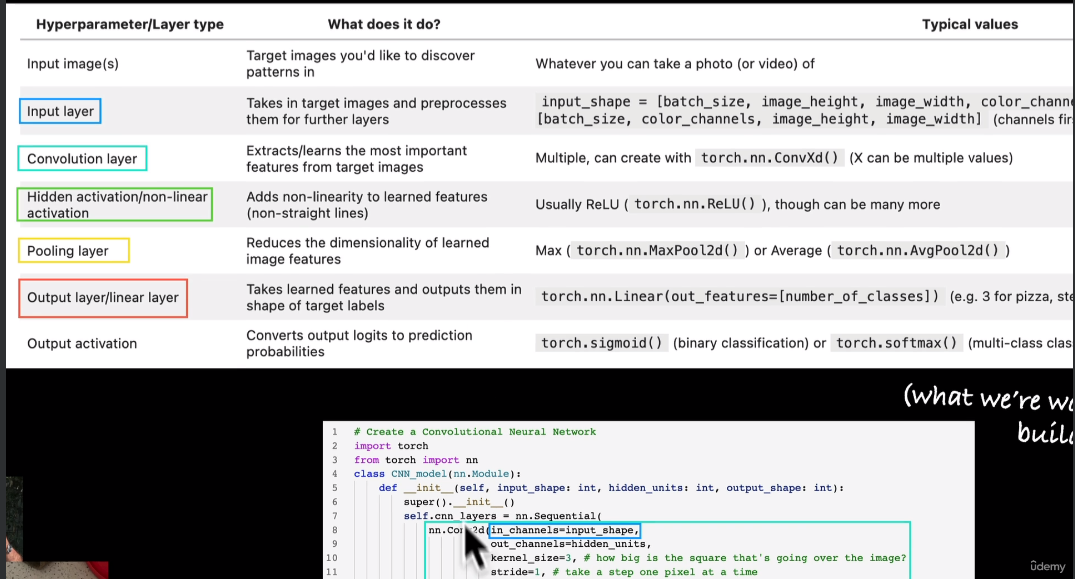

### CNN High-level workflow
* Simple CNN vs. Deep CNNs
* More layers or deeper your network is, the more chances it has to find patterns in the data.

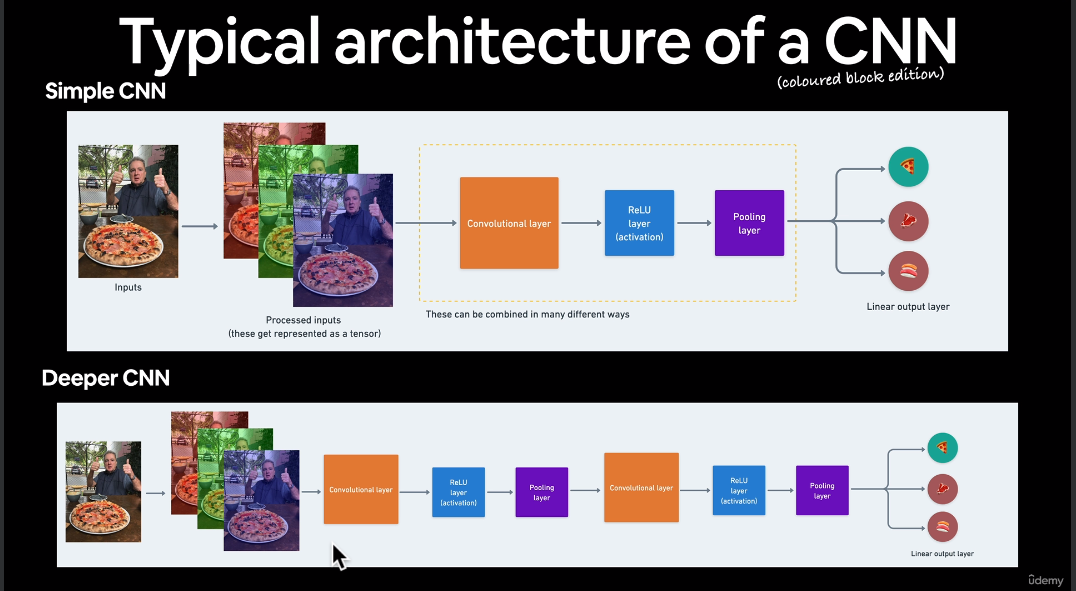

To see what is going on inside a CNN see this site: https://poloclub.github.io/cnn-explainer/

Note about VGGNet
* VGGNet was born out of the need to reduce the # of parameters in the CONV layers and improve on training time.
* Great review article on VGGNet vs. ResNet and other CNN architectures: https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96

In [47]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    ## creating the CNN network in "blocks" or "layers" - blocks = multi layer
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, #can be tuple (3,3)
                  stride=1,
                  padding=1), #values we set ourselves in NN's are called hyperparams
        nn.ReLU(), #non-linear activation function
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    ## build a classifier layer
    self.classifier = nn.Sequential(
        nn.Flatten(), #flatten into single feature vector
        nn.Linear(in_features=hidden_units*7*7, # trick to calculate this *7*7 is output shape of conv_block_2
                  out_features=output_shape)
    )

  # build forward layer
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x


In [48]:
## instantiate CNN model_2
torch.manual_seed(42)

## model_2
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [49]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [50]:
# pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))


tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

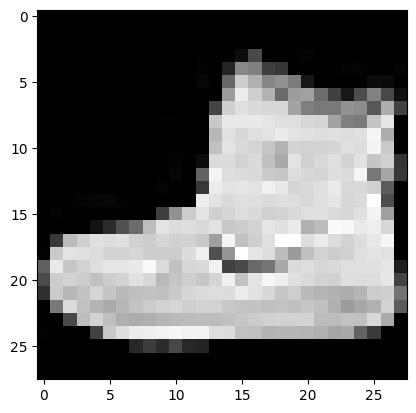

In [51]:
plt.imshow(image.squeeze(), cmap="gray");

### Create random tensor that is same shape as our image

In [52]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

Same shape as our test image but with random numbers.

### 7.1 Stepping through `nn.Conv2d()`
* PyTorch docs: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [53]:
## create dummy data
torch.manual_seed(42)

# create batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [54]:
## PyTorch defaults to color channels first (3)
test_image.shape

torch.Size([3, 64, 64])

In [55]:
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10, #hidden units
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
            6.6224e-01, -2.3216e-01],
          [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
           -1.8552e-01, -5.7622e-01],
          [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
            1.4923e-01,  1.4236e-01],
          ...,
          [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
            4.2594e-01, -4.8341e-01],
          [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
           -3.6626e-01,  3.5645e-01],
          [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
           -4.9680e-01, -7.2258e-01]],

         [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
           -1.7643e+00,  2.5263e-01],
          [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
            4.8068e-01,  8.4869e-01],
          [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
            2.4611e-01,  6.6233e-01],
          ...,
     

In [56]:
## adding a dimension to image
#test_image.unsqueeze(0).shape

In [57]:
test_image.shape

torch.Size([3, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`
* PyTorch docs: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#maxpool2d

In [58]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [59]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv.shape} ")


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 62, 62]) 


In [60]:
# set manual_seed
torch.manual_seed(42)

# create random tensor with similar number of dimensions - 4D tensor
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass random tensor through max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")
random_tensor


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

### 7.3 Setup a loss function and optimizer for `model_2`

In [61]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

## loss_fn
loss_fn = nn.CrossEntropyLoss() # multi-class classification problem
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)

In [62]:
## print model_2 state_dict()
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and testing `model_2` using our training and test functions -- our first Convolutional Neural Network (CNN)!!

In [63]:
# set manual_sed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time it takes to train model
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


## timer
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.59518 | Train acc: 78.38%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.39500 | Test acc: 85.99%

Epoch: 1
------
Train loss: 0.36421 | Train acc: 86.86%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.38940 | Test acc: 86.13%

Epoch: 2
------
Train loss: 0.32472 | Train acc: 88.31%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.34938 | Test acc: 87.46%

Train time on cpu: 152.031 seconds


In [64]:
## gpu check
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [65]:
# get results dict for model_2
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device

)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34938228130340576,
 'model_acc': 87.46006389776358}

In [66]:
## model_0 results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### Summary
* We beat our baseline model_0 with our CNN model_2!!! The CNN was more accurate!

## 8. Compare model results and training time
* Let's create a dataframe comparing them.

In [67]:
import pandas as pd

## create a df and pass in the model_results dicts
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.960163,65.625000
2,FashionMNISTModelV2,0.349382,87.460064


In [68]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]


compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,31.522221
1,FashionMNISTModelV1,0.960163,65.625000,31.712064
2,FashionMNISTModelV2,0.349382,87.460064,152.031430


In [69]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


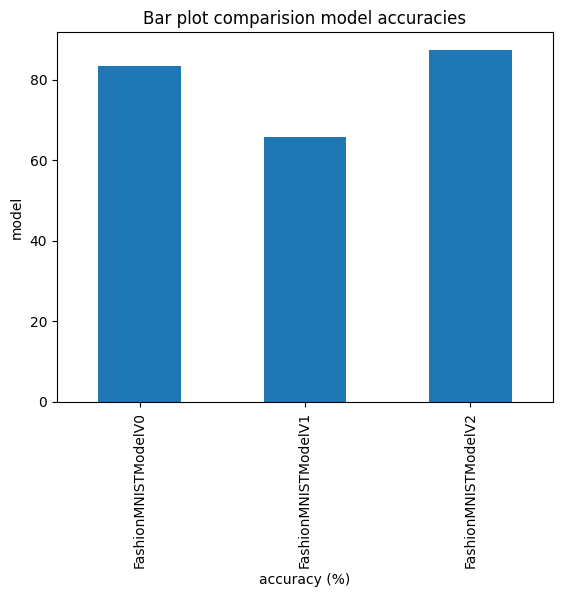

In [70]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="bar")
plt.xlabel("accuracy (%)")
plt.ylabel("model");
plt.title("Bar plot comparision model accuracies")
plt.show();

## 9. Make and evaluate random predictions with best model

In [71]:
## predictions function
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  # create empty list for pred_probabilities - take random samples from test data --> make preds --> plot preds
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit --> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # pred probability for given sample

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

# Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs) # concat everything in list to single tensor

In [75]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

### Random sample from the test set

In [96]:
import random
random.seed(42)
test_samples = []
test_labels = []

# randomly sampling 9 samples from test_data
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

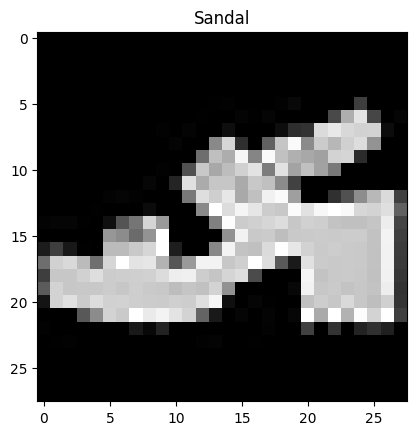

In [97]:
## print it out
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [98]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first 2 prediction probabilities
pred_probs[:2]

tensor([[2.7525e-07, 1.3385e-07, 3.3624e-07, 6.1825e-07, 3.5886e-08, 9.9495e-01,
         2.0080e-07, 1.7272e-04, 4.1631e-05, 4.8373e-03],
        [1.0882e-02, 9.1716e-01, 3.1378e-04, 4.5055e-02, 2.0009e-03, 8.8222e-06,
         2.3542e-02, 1.1175e-04, 8.5854e-04, 6.4103e-05]])

In [99]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [100]:
# Convert pred probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

In [101]:
# same format as test labels?
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

Note: pred_classes are in same order as test_labels

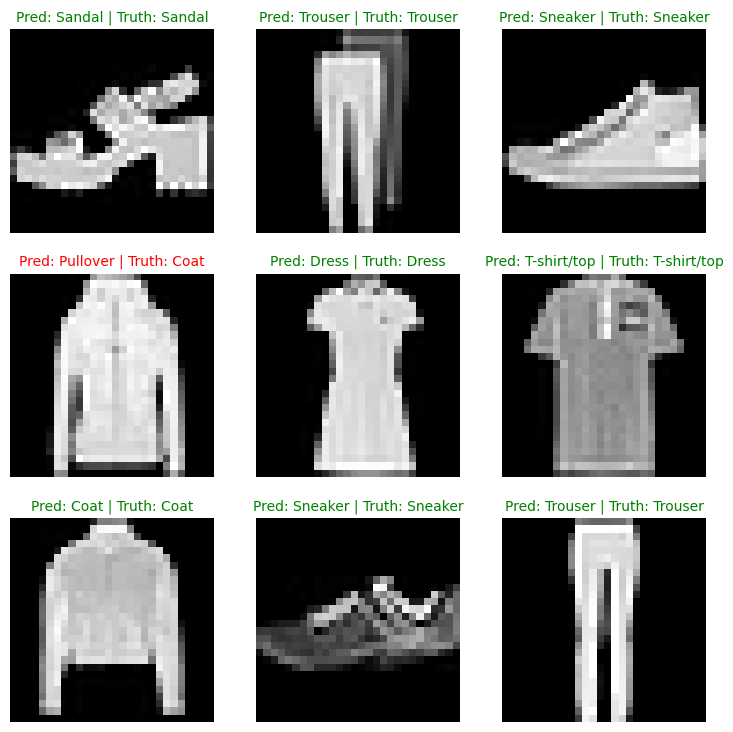

In [102]:
# plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")


  plt.axis(False);


## 10. Making a confusion matrix for further prediction evaluation
* A confusion matrix is a fantastic way of evaluating your classification models visually: https://www.learnpytorch.io/03_pytorch_computer_vision/#9-make-and-evaluate-random-predictions-with-best-model

1. Make predictions with our trained model on the test dataset.
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
    * docs: https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html

3. Plot confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`-
    * docs: https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [107]:
## make predictions across entire test dataset

# import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits --> prediction probabilities --> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 3, 2, 4, 8, 0, 2, 7, 7, 5,
        1, 2, 6, 6, 9, 4, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1, 4, 2, 4, 4, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 6, 2, 6, 4, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 2]), tensor([6, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 6, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 4, 6, 1, 2, 8, 1, 6, 0, 6, 1, 6, 1, 3, 2, 2, 4, 4,
        1, 4, 8, 6, 4, 7, 9, 3]), tensor([7, 2, 3, 8, 0, 9, 2, 7, 4, 2, 6, 5, 4, 1, 2, 1, 3, 6, 8, 1, 0, 9, 3, 6,
        7, 9, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 6, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 4, 0]), tensor([7, 7, 6, 4, 7, 6, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 4, 9, 2, 2, 8, 6, 4,
        2, 4, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 3, 6, 2, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1,  ..., 8, 1, 2])

In [108]:
# len of y_pred_tensor
len(y_pred_tensor)

10000

In [103]:
import mlxtend

In [104]:
mlxtend.__version__

'0.22.0'

In [111]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 12.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [115]:
## See if required packages are installed and if not, install them....
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.2 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [113]:
assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"

In [116]:
import mlxtend
print(mlxtend.__version__)

0.22.0


In [117]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [118]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [119]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

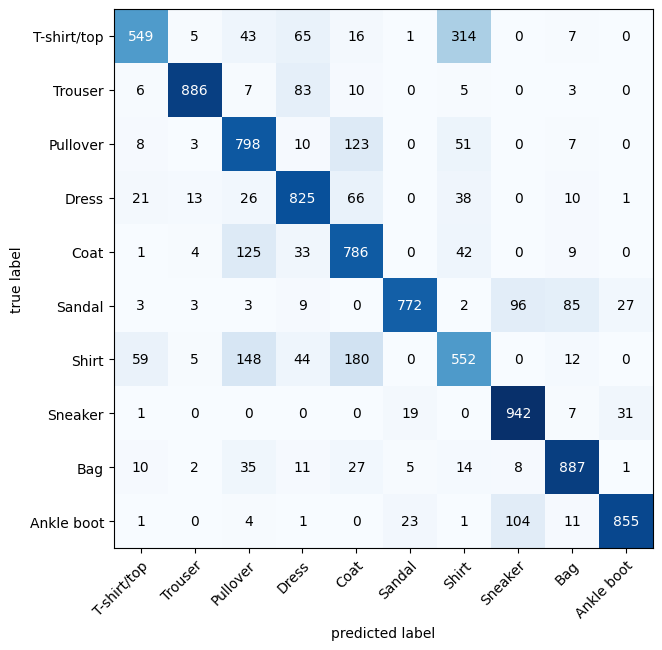

In [124]:
# import confusion matrix and plotting function from torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
# create a confusion matrix tensor
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), #matplotlib likes working with numpy
    class_names = class_names,
    figsize=(10,7)
)

### Observations
* We can see the model does pretty well since most of the **dark squares are down the diagonal** from top left to bottom right (and ideal model will have only values in these squares and 0 everywhere else).

* The model gets most "confused" on classes that are similar, for example predicting "Pullover" for images that are actually labelled "Shirt".

* And the same for predicting "Shirt" for classes that are actually labelled "T-shirt/top".

* This kind of information is often more helpful than a single accuracy metric because it tells use where a model is getting things wrong.

* It also hints at why the model may be getting certain things wrong.

* It's understandable the model sometimes predicts "Shirt" for images labelled "T-shirt/top".

* We can use this kind of information to further inspect our models and data to see how it could be improved.

## 11. Save and load best performing model

In [128]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME



# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH) # f is model save path

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [126]:
## model_2 state_dict()
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 3.4499e-01,  3.9632e-01, -4.6718e-01],
                        [ 1.4581e-01,  2.5146e-01,  4.8888e-02],
                        [-4.4625e-01,  1.3540e-02,  2.2378e-01]]],
              
              
                      [[[-4.7943e-01,  5.2994e-01, -8.9149e-02],
                        [ 2.2647e-01,  4.5428e-01,  9.9778e-02],
                        [-2.4341e-01,  2.2578e-01,  1.0258e-01]]],
              
              
                      [[[-3.9372e-01, -7.5386e-02, -2.5212e-02],
                        [-6.3204e-01, -6.6724e-01,  2.0643e-01],
                        [-7.9207e-01, -6.1475e-01, -1.0216e-01]]],
              
              
                      [[[-7.9835e-01, -8.9218e-01, -6.7539e-01],
                        [ 2.2395e-01, -6.5609e-01,  1.5425e-01],
                        [ 1.5879e-01, -6.4099e-02,  3.5904e-01]]],
              
              
                      [[[-1.0685e-01,  2.7142e-01, -1

In [129]:
image_shape = [1, 28, 28]

In [130]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# load in saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [131]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34938228130340576,
 'model_acc': 87.46006389776358}

In [132]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34938228130340576,
 'model_acc': 87.46006389776358}

In [134]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)